In [73]:
import numpy as np
import pandas as pd

In [105]:
crop = pd.read_csv("Crop_recommendation.csv")
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [75]:
crop.shape

(2200, 8)

In [76]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [77]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [78]:
crop.duplicated().sum()

0

In [79]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [80]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

C:\Users\essam\AppData\Local\Temp\ipykernel_21036\1223965067.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


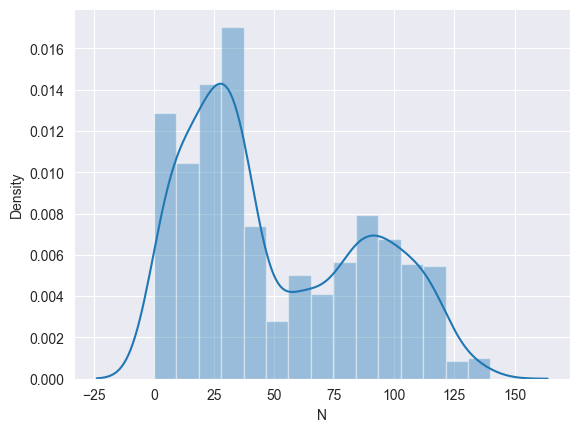

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [82]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['crop_num'] = crop['label'].map(crop_dict)

In [83]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [84]:
crop.drop('label', axis=1, inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [85]:
x = crop.drop('crop_num', axis=1)
y = crop['crop_num']

In [86]:
x.shape

(2200, 7)

In [87]:
y.shape

(2200,)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [90]:
x_train.shape

(1760, 7)

In [91]:
x_test.shape

(440, 7)

In [92]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [93]:
# Scale the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [94]:
ms = MinMaxScaler()

In [95]:
ms.fit(x_train)
x_train = ms.transform(x_train)
x_test = ms.transform(x_test)

In [96]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [97]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [98]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [99]:
# Training Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


models = {
    'lg': LogisticRegression(),
    'gnb': GaussianNB(),
    'svc': SVC(),
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(),
    'et': ExtraTreeClassifier(),
    'rf': RandomForestClassifier(),
    'bgc': BaggingClassifier(),
    'gbc': GradientBoostingClassifier(),
    'adaboost': AdaBoostClassifier(algorithm='SAMME')
}

for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)

    print(f"{name} with accuracy : {accuracy_score(y_test, ypred)}")


lg with accuracy : 0.9636363636363636
gnb with accuracy : 0.9954545454545455
svc with accuracy : 0.9681818181818181
knn with accuracy : 0.9590909090909091
dt with accuracy : 0.9886363636363636
et with accuracy : 0.8977272727272727
rf with accuracy : 0.9931818181818182
bgc with accuracy : 0.9863636363636363
gbc with accuracy : 0.9818181818181818
adaboost with accuracy : 0.14545454545454545


In [100]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)
accuracy_score(y_test, ypred)

0.9931818181818182

In [101]:
# Predictive System
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    prediction = rfc.predict(features).reshape(1,-1)

    return prediction[0]

In [102]:
N = 10
P = 10
k = 10
temperature = 10.0
humidity = 10
ph = 1
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {
    1: 'Rice', 2: 'Maize', 3: 'Jute', 4: 'Cotton', 5: 'Coconut', 6: 'Papaya', 7: 'Orange',
    8: 'Apple', 9: 'Muskmelon', 10: 'Watermelon', 11: 'Grapes', 12: 'Mango', 13: 'Banana',
    14: 'Pomegranate', 15: 'Lentil', 16: 'Blackgram', 17: 'Mungbean', 18: 'Mothbeans',
    19: 'Pigeonpeas', 20: 'kidneybeans', 21: 'Chickpea', 22: 'Coffee'
}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print(f"{crop} is the best crop to be cultivated.")
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Apple is the best crop to be cultivated.


In [103]:
import pickle
pickle.dump(rfc,open('model.pkl', 'wb'))

In [104]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# 
# # Load the dataset
# crop = pd.read_csv("Crop_recommendation.csv")
# 
# # Create a dictionary to map crop names to numerical labels
# crop_dict = {
#     'rice': 1,
#     'maize': 2,
#     'jute': 3,
#     'cotton': 4,
#     'coconut': 5,
#     'papaya': 6,
#     'orange': 7,
#     'apple': 8,
#     'muskmelon': 9,
#     'watermelon': 10,
#     'grapes': 11,
#     'mango': 12,
#     'banana': 13,
#     'pomegranate': 14,
#     'lentil': 15,
#     'blackgram': 16,
#     'mungbean': 17,
#     'mothbeans': 18,
#     'pigeonpeas': 19,
#     'kidneybeans': 20,
#     'chickpea': 21,
#     'coffee': 22
# }
# 
# # Add a new column "crop_num" to the dataset
# crop['crop_num'] = crop['label'].map(crop_dict)
# 
# # Split the data into features (X) and target variable (y)
# X = crop.drop('label', axis=1)
# y = crop['crop_num']
# 
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# # Normalize the features using MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# 
# # Train a Random Forest Classifier
# rfc = RandomForestClassifier(class_weight='balanced')  # Use class_weight='balanced' to handle class imbalance
# rfc.fit(X_train_scaled, y_train)
# 
# # Predict on the testing set
# y_pred = rfc.predict(X_test_scaled)
# 
# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")
# 
# # Create a function to make predictions for new data
# def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
#     features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
#     features_scaled = scaler.transform(features)
#     predicted_crop_num = rfc.predict(features_scaled)[0]
#     predicted_crop_name = list(crop_dict.keys())[list(crop_dict.values()).index(predicted_crop_num)]
#     return predicted_crop_name
# 
# # Example usage
# N = 90
# P = 60
# K = 60
# temperature = 340.0
# humidity = 100
# ph = 7
# rainfall = 300
# 
# recommended_crop = recommend_crop(N, P, K, temperature, humidity, ph, rainfall)
# print(f"Recommended crop: {recommended_crop}")